In [45]:
#Importando as bibliotecas
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [16]:
#1-Preparação dos dados
#Importando a base de dados
data = pd.read_csv('dadosacoes.csv')

In [17]:
#Verificando os dados da base de dados
data.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [18]:
#2- Exploração dos dados
#Criando o dataframe
df = pd.DataFrame(data)

In [19]:
df# Exibe os valores

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975
...,...,...,...,...
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866


In [20]:
df.info() #exibe informações sobre o novo dataframe criado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [21]:
#Vendo as informações do dataframe
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


Text(0.5, 1.0, 'Nome da ação X preço da ação')

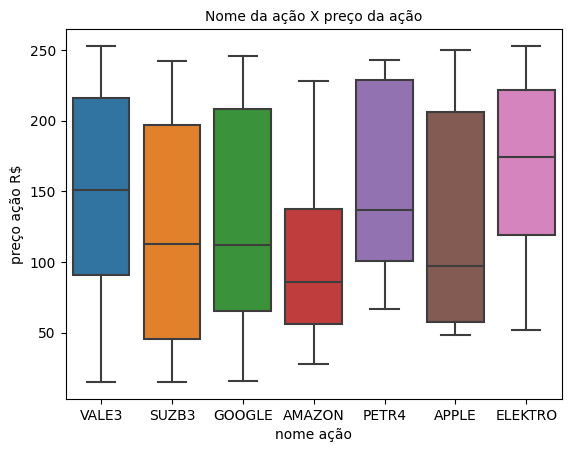

In [22]:
sns.boxplot(x= df['nome ação'],y= df['preço ação R$'])
plt.title("Nome da ação X preço da ação", fontsize=10)

Text(0.5, 1.0, 'Nome da ação X valor de mercado')

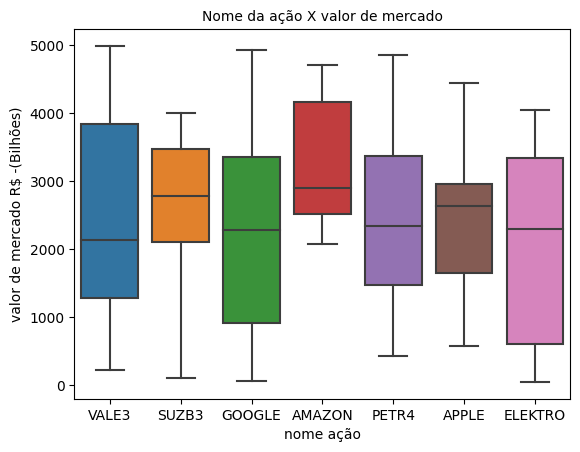

In [23]:
sns.boxplot(x= df['nome ação'],y= df['valor de mercado R$ -(Bilhões)'])
plt.title("Nome da ação X valor de mercado", fontsize=10)

In [24]:
# Pré-processamento dos dados
# Utilizar o pdget_dummies(nome_dataframe,columns=[‘nome da coluna’],drop_rst=True) para
#transformar a coluna de variáveis categóricas para True ou false para aplicar o algoritmo K-means

df_processado = pd.get_dummies(df, columns=['nome ação'], drop_first=True)

In [25]:
# Selecionando as colunas para o algoritmo K-means
caracteristicas = ['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']
X = df_processado[caracteristicas]

In [30]:
# Escalar os dados para normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Aplicando o algoritmo K-means com os 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(X_scaled)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [33]:
# Adicionando os clusters ao DataFrame
df['Cluster_4'] = clusters_4

In [34]:
# Calculando o número de clusters com n_clusters = 5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
clusters_5 = kmeans_5.fit_predict(X_scaled)
df['Cluster_5'] = clusters_5

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
# Calculando o número de clusters com n_clusters = 8
kmeans_8 = KMeans(n_clusters=8, random_state=42)
clusters_8 = kmeans_8.fit_predict(X_scaled)
df['Cluster_8'] = clusters_8

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
#Visualizando o dataframe após os clusters
df

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),Cluster_4,Cluster_5,Cluster_8
0,VALE3,194,45,2134,0,3,0
1,SUZB3,91,71,3069,3,4,6
2,SUZB3,165,41,2815,2,2,2
3,SUZB3,56,34,3613,2,1,7
4,GOOGLE,212,9,2975,2,2,2
...,...,...,...,...,...,...,...
95,SUZB3,208,78,3035,1,4,4
96,VALE3,253,60,3263,1,2,4
97,GOOGLE,99,35,980,2,1,3
98,VALE3,82,43,1866,3,1,3


In [38]:
# FAzendo o gráfico do cotovelo 
inercia = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [39]:
# Fzendo o gráfico da silhueta
silhueta = []
for i in range(2, 9):  # Silhueta requer pelo menos dois clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhueta.append(silhouette_score(X_scaled, labels))

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [40]:
# Retornando a tabela atualizada com os clusters formados
df.head(), inercia, silhueta

(  nome ação  preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
 0     VALE3            194          45                            2134   
 1     SUZB3             91          71                            3069   
 2     SUZB3            165          41                            2815   
 3     SUZB3             56          34                            3613   
 4    GOOGLE            212           9                            2975   
 
    Cluster_4  Cluster_5  Cluster_8  
 0          0          3          0  
 1          3          4          6  
 2          2          2          2  
 3          2          1          7  
 4          2          2          2  ,
 [300.0,
  218.07834939198938,
  169.38847118129274,
  127.29008324785923,
  104.8227809587021,
  87.31457564189836,
  75.2758744953562,
  67.16440861730337],
 [0.26457550037484195,
  0.26728641154982696,
  0.3029520474311305,
  0.29536088127145665,
  0.31975347350093036,
  0.30700382361165524,
  0.3112732711769992])

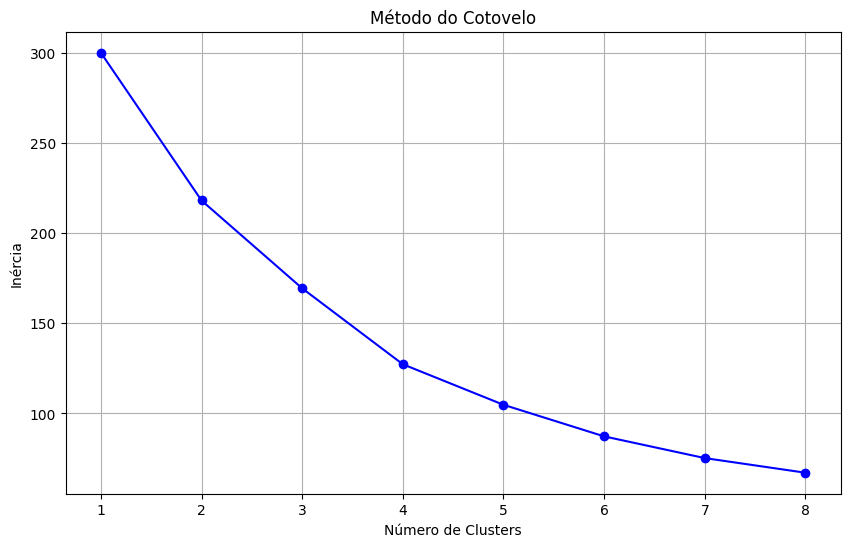

In [42]:
# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), inercia, 'bo-')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, 9))
plt.grid(True)
plt.show()

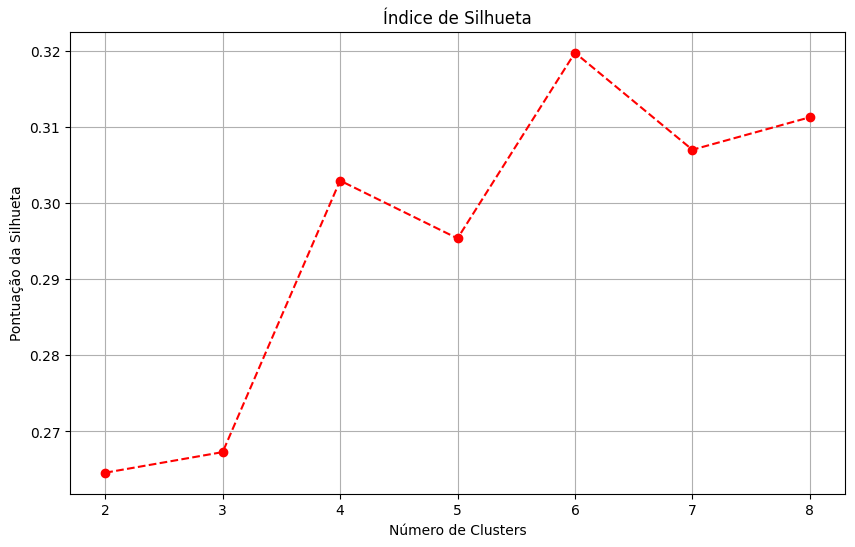

In [44]:
# Plotando o gráfico da silhueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), silhueta, marker='o', linestyle='--', color='red')
plt.title('Índice de Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.xticks(range(2, 9))
plt.grid(True)
plt.show()

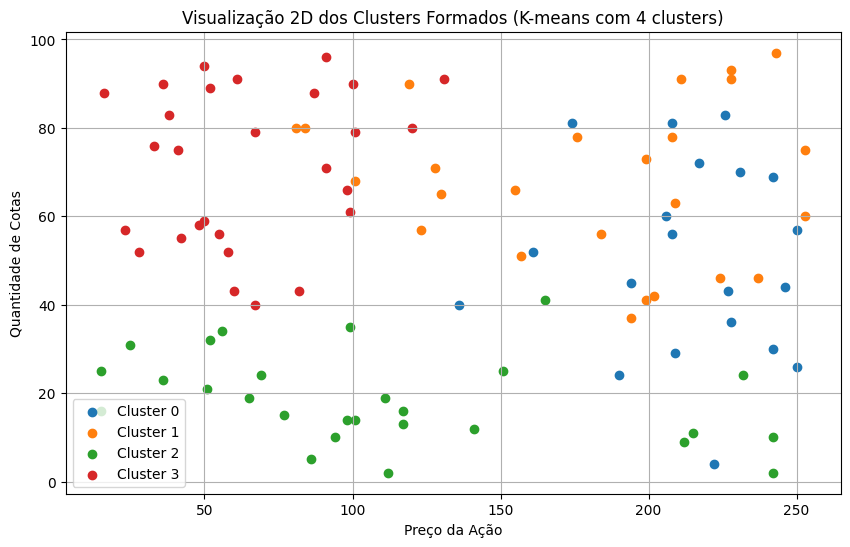

In [46]:
# Visualização 2D dos clusters formados
plt.figure(figsize=(10, 6))
for cluster in range(4):
    plt.scatter(
        df[df['Cluster_4'] == cluster]['preço ação R$'],
        df[df['Cluster_4'] == cluster]['qtde cotas'],
        label=f'Cluster {cluster}'
    )
plt.title('Visualização 2D dos Clusters Formados (K-means com 4 clusters)')
plt.xlabel('Preço da Ação')
plt.ylabel('Quantidade de Cotas')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),Cluster_4,Cluster_5,Cluster_8
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,136.140000,52.010000,2433.70000,1.630000,2.000000,3.420000
std,75.237942,27.475791,1397.29373,1.097794,1.504203,2.470758
min,15.000000,2.000000,52.00000,0.000000,0.000000,0.000000
25%,67.000000,28.250000,1189.25000,1.000000,1.000000,1.000000
50%,121.500000,55.500000,2433.00000,2.000000,2.000000,3.000000
75%,209.000000,76.500000,3616.50000,3.000000,3.000000,6.000000
max,253.000000,97.000000,4993.00000,3.000000,4.000000,7.000000


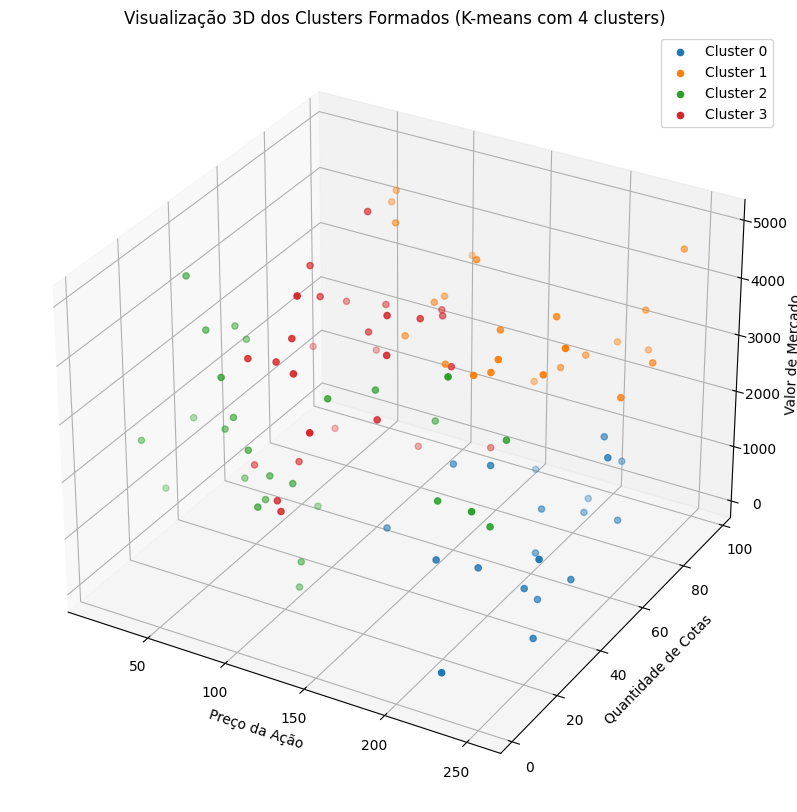

In [51]:
# Visualização 3D dos clusters formados
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(4):
    ax.scatter(
        df[df['Cluster_4'] == cluster]['preço ação R$'],
        df[df['Cluster_4'] == cluster]['qtde cotas'],
        df[df['Cluster_4'] == cluster]['valor de mercado R$ -(Bilhões)'],
        label=f'Cluster {cluster}'
    )

ax.set_title('Visualização 3D dos Clusters Formados (K-means com 4 clusters)')
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado')
ax.legend()
plt.show()